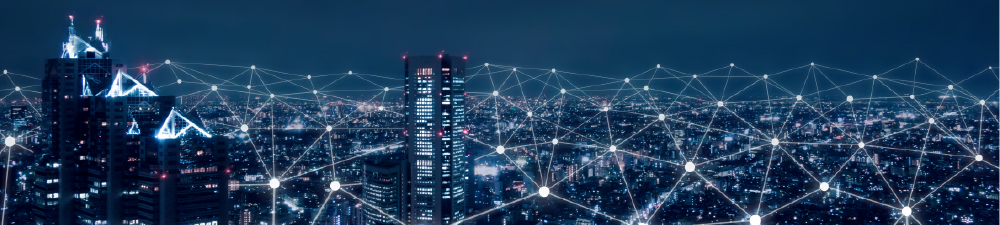

# BDA10 - Group 8 HoRISEn

# Mini Project 2 - IU 4.5 Statistical Analysis

## Packages and setup

In [44]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib.ticker as mtick
import scipy.stats as stats

from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import bootstrap
from statsmodels.stats import weightstats as stests

%matplotlib inline

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_style("whitegrid")

ImportError: cannot import name 'bootstrap' from 'scipy.stats' (C:\Users\65853\anaconda3\lib\site-packages\scipy\stats\__init__.py)

### Reading data and initial processing

In [84]:
#Read data using pandas
user_df=pd.read_csv("C:/Users/65853/Desktop/BCG/Python notebooks/Mini Project 2/Mini_project_2_Data.xls")

#Check data types of each column using "dtypes" function
print("Data types for the data set:")
user_df.dtypes

#Check dimension of data i.e. # of rows and #column using pandas "shape" funtion
print("Shape of the data i.e. no. of rows and columns")
user_df.shape

#display first 5 rows of the data using "head" function
print("First 5 rows of the raw data:")
user_df.head(5)

# Basic info
user_df.sum_gamerounds.describe()
user_df.nunique()

Data types for the data set:
Shape of the data i.e. no. of rows and columns
First 5 rows of the raw data:


userid            90189
version               2
sum_gamerounds      942
retention_1           2
retention_7           2
dtype: int64

## Exercise

## Q1. Detect and resolve problems in the data (Missing value, Outliers, etc.)

### Q1.1 Identify missing value

In [48]:
#Check for any missing values in the data using isnull() function

pd.isnull(user_df).sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

### Q1.2 Identify outliers

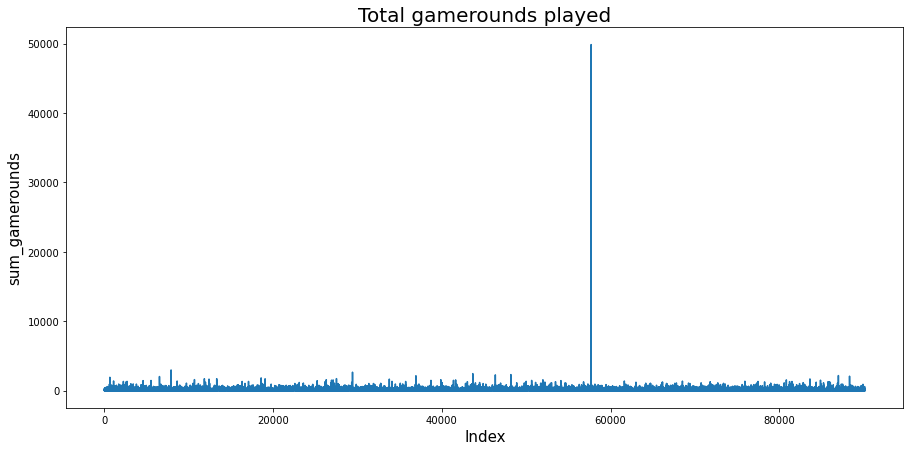

In [49]:
#Check for outlier values in sum_gamerounds column

plt.figure(figsize=(15,7))
plt.title("Total gamerounds played", fontdict={'fontsize':20})
plt.xlabel("Index", fontdict={'fontsize':15})
plt.ylabel("sum_gamerounds",fontdict={'fontsize':15})
plt.plot(user_df.sum_gamerounds)
plt.show()

In [50]:
#Based on the plot, filter out the outlier from sum_gamerounds played; Use max() fucntion to find the index of the outlier

# Find maximum value and index of the maximum value
max_value = user_df.sum_gamerounds.max()
max_value_index = user_df.sum_gamerounds.idxmax()

print('Maximum Value =', max_value, ', Maximum Value Index =', max_value_index)

# Remove maximum value
user_df.drop(index=max_value_index, inplace=True)

Maximum Value = 49854 , Maximum Value Index = 57702


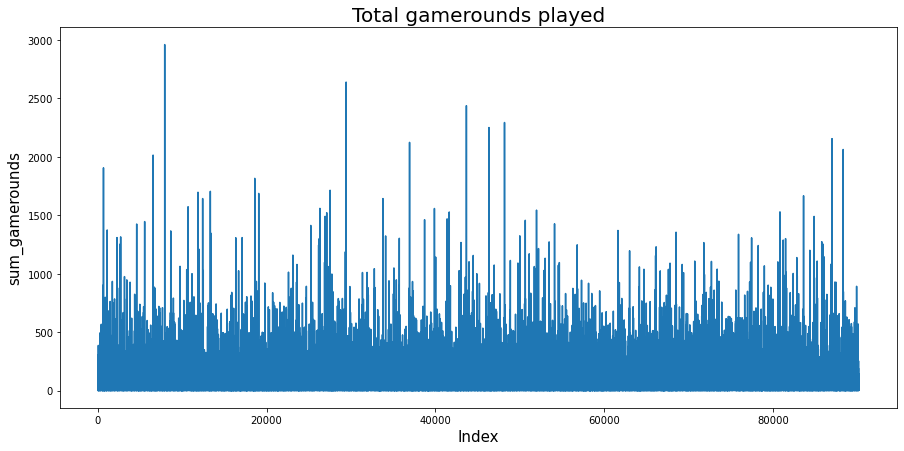

In [51]:
#Plot the graph for sum_gamerounds player after removing the outlier

plt.figure(figsize=(15,7))
plt.title("Total gamerounds played", fontdict={'fontsize':20})
plt.xlabel("Index", fontdict={'fontsize':15})
plt.ylabel("sum_gamerounds",fontdict={'fontsize':15})
plt.plot(user_df.sum_gamerounds)
plt.show()

## Q2. Plot summary statistics and identify trends to answer basis business questions

### Q2.1 What is the overall 7-day retention rate of the game?

In [52]:
#Insert calculation for 7-day retention rate

retention_rate_7 = user_df.retention_7.sum() / user_df.shape[0]

print("Overall Day 7 retention rate of the game is: {:,.3%}".format(retention_rate_7))


Overall Day 7 retention rate of the game is: 18.606%


### Q2.2 How many players never played the game after installing? 

In [53]:
# Find number of customers with sum_gamerounds is equal to zero

zero_game = sum(user_df.sum_gamerounds == 0)

print('Customers with sum_gamerounds is equal to zero = {:,}'.format(zero_game))


Customers with sum_gamerounds is equal to zero = 3,994


### Q2.3 Does the number of users decrease as the level progresses highlighting the difficulty of the game?

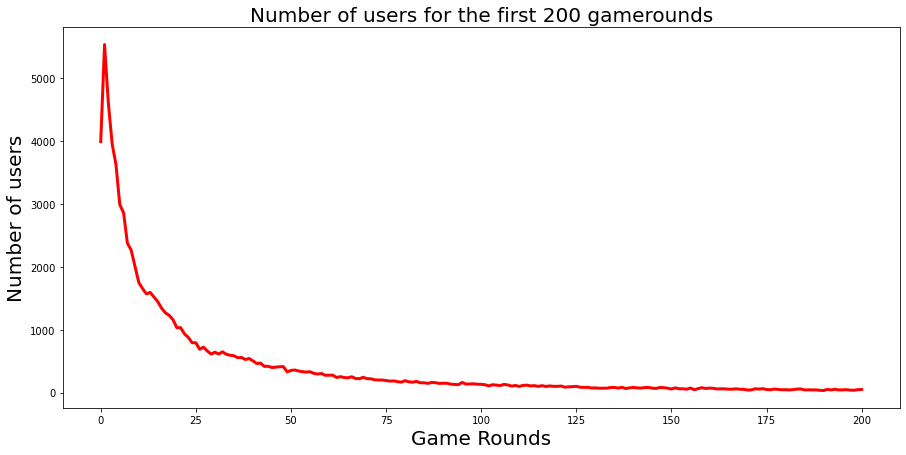

Yes, the number of users decrease as the level progresses, highlighting the difficulty of the game.


In [54]:
#Group by sum_gamerounds and count the number of users for the first 200 gamerounds
#Use plot() function on the summarized stats to visualize the chart

df_200 = user_df.groupby('sum_gamerounds').count()[['userid']][:201]

plt.figure(figsize=(15,7))
plt.title("Number of users for the first 200 gamerounds", fontdict={'fontsize':20})
plt.xlabel("Game Rounds", fontdict={'fontsize':20})
plt.ylabel("Number of users", fontdict={'fontsize':20})
plt.plot(df_200, color='r', linewidth=3)
plt.show()

print('Yes, the number of users decrease as the level progresses, highlighting the difficulty of the game.')

## Q3. Generate crosstab for two groups of players to understand if there is a difference in 7 day retention rate & total number of game rounds played

### Q3.1 Seven days retention rate summary for different game versions

In [55]:
#Create cross tab for game version and retention_7 flag counting number of users for each possible categories

df_ct1 = pd.crosstab(user_df.version, user_df.retention_1).apply(lambda r: r/r.sum(), axis=1)
df_ct2 = pd.crosstab(user_df.version, user_df.retention_7).apply(lambda r: r/r.sum(), axis=1)

display(df_ct1, df_ct2)

retention_1,False,True
version,,
gate_30,0.551802,0.448198
gate_40,0.557717,0.442283


retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


<mark>__Analysis Results:__
    
- <mark>1-day retention rate for gate_30 and gate_40 is 44.8% and 44.2% respectively.
- <mark>7-day retention rate for gate_30 and gate_40 is 19.0% and 18.2% respectively.
- <mark>Retention rates for gate_30 are higher than for gate_40 for both retention_1 and retention_7.


### Q3.2 Gamerounds summary for different game versions

In [56]:
#use pandas group by to calculate average game rounds played summarized by different versions

user_df.groupby('version').mean()[['sum_gamerounds']]

user_df.groupby('version').sum()[['sum_gamerounds']]

,sum_gamerounds
version,
gate_30,2294941
gate_40,2333530


<mark>__Analysis Results:__

- <mark>The average game rounds played for gate_30 is 51.342111 and gate_40 is 51.298776
- <mark>The total number of game rounds played for gate_30 and gate_40 is 2,294,941 and 2,333,530 respectively. 


## Q4. Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different

### Initial data processing

In [57]:
#Define A/B groups for hypothesis testing

user_df["version"] = np.where(user_df.version == "gate_30", "A", "B")
group_A=pd.DataFrame(user_df[user_df.version=="A"]['sum_gamerounds'])
group_B=pd.DataFrame(user_df[user_df.version=="B"]['sum_gamerounds'])

### Q4.1 Shapiro test of Normality

In [58]:
#---------------------- Shapiro Test ----------------------
# NULL Hypothesis H0: Distribution is normal
# ALTERNATE Hypothesis H1: Distribution is not normal    

print('Significance level α at 5% or confidence interval at 95%')

#test for group_A
stats.shapiro(group_A.sum_gamerounds)

#test for group_B
stats.shapiro(group_B.sum_gamerounds)

print('p-value for Group_A =', stats.shapiro(group_A)[1])
print('p-value for Group_B =', stats.shapiro(group_B)[1])

Significance level α at 5% or confidence interval at 95%
p-value for Group_A = 0.0
p-value for Group_B = 0.0


C:\Users\65853\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [59]:
stats.shapiro(group_A)[1]

0.0

<mark>__Analsysis Results:__
    
- <mark>To evaluate a data sample and to quantify how likely it is that the data was drawn from a Gaussian distribution, we use the Shapiro-Wilk test of normality.
    - <mark>H0: Distribution is normal
    - <mark>H1: Distribution is not normal    
- <mark> Since the p-value is lower than our significance level α at 5%, we should reject the null hypothesis for both Group_A and Group_B and accept the alternate hypothesis that both samples are not normal distrbution.

### Q4.2 Test of homegienity of variance

In [60]:
#---------------------- Leven's Test ----------------------
# NULL Hypothesis H0: Two groups have equal variances
# ALTERNATE Hypothesis H1: Two groups do not have equal variances

# perform levene's test and accept or reject the null hypothesis based on the results

stats.levene(group_A.sum_gamerounds, group_B.sum_gamerounds, center='median')
stats.levene(group_A.sum_gamerounds, group_B.sum_gamerounds, center='mean')
stats.levene(group_A.sum_gamerounds, group_B.sum_gamerounds, center='trimmed')

LeveneResult(statistic=3.6475319198410383, pvalue=0.056155885179886386)

<mark>__Analysis Results:__
    
- <mark>To determine whether "two or more" groups have equal variances, we use the Levene’s Test.
    - <mark>H0: Two groups have equal variances
    - <mark>H1: Two groups do not have equal variances
- <mark>In all three methods, the p-value is not less than .05. This means in all 3 cases, we fail to reject the null hypothesis. Furthermore, we do not have sufficient evidence to say that the variance between group_A and group_B sample is significantly different.

### Q4.3 Test of significance: Two sample test

In [61]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: Two samples are different

#Apply relevant two sample test to accept or reject the NULL hypothesis

stats.ttest_ind(a= group_A.sum_gamerounds, b= group_B.sum_gamerounds, equal_var=True) 


Ttest_indResult(statistic=0.0633675766982082, pvalue=0.9494739458256001)

<mark>__Analysis Results:__
    
- <mark>As the two samples are not normally distributed and are likely to have equal variance, we perform a two-sample t-test to investigate whether the means of the two independent data samples differ from one another.
    - <mark>H0: Two samples are equal
    - <mark>H1: Two samples are different
    
<mark> - The test yields a p-value of 0.949. If we were using a significance level α at 5%, we fail to reject the null hypothesis that suggests that the two samples are equal, since the p-value is greater than the corresponding significance level of 5%.

## Q5. Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

In [62]:
#Analyze the Day 1 and Day 7 retention rate for two different groups using group by function

# H0 : the distributions of both populations are equal
# H1 : the distributions are not equal.

- <mark>To test whether two categorical variables are independent, we will use the Chi Square test of independence
    - <mark>H0 : There is no statistical difference between the Gate 30 and Gate 40 version
    - <mark>H1 : There is a statistical difference between the Gate 30 and Gate 40 version

Formula: $$  \chi^2 = \sum_{i,j}\frac{(observed_{i,j}- expected_{i,j})^2} {(expected_{i,j})}  $$


### Day 1 retention

In [63]:
# Create cross tab for game version and retention_1 flag counting number of users for each possible categories
retention1 = pd.crosstab(user_df.version, user_df.retention_1, margins=True)
retention1.columns = ['false', 'true', 'row_totals']
retention1.index = ['A', 'B', 'col_totals']

# Extract the observed retention data
observed1 = retention1.iloc[0:2,0:2]

# Calculate expected counts for Group A & Group B
expected1 = pd.DataFrame(np.outer(retention1['row_totals'][0:2],retention1.loc['col_totals'][0:2]) / observed1.sum().sum())
expected1.columns = ['false', 'true']
expected1.index = ['A', 'B']
expected1 = expected1.astype('int')

# Display the Day 1 retention data
display(retention1, 'Day 1 Retention')
display(observed1, 'Observed')
display(expected1, 'Expected')

,false,true,row_totals
A,24665,20034,44699
B,25370,20119,45489
col_totals,50035,40153,90188


'Day 1 Retention'

,false,true
A,24665,20034
B,25370,20119


'Observed'

,false,true
A,24798,19900
B,25236,20252


'Expected'

In [64]:
# Calculate the chi square statistic
chi_squared_stat1 = (((observed1-expected1)**2)/expected1).sum().sum()
print('Day 1 retention - Chi Square Statistic: {:.3f}'.format(chi_squared_stat1))

# Calculate critical value and p value
ci1 = 0.95 # 95% confidence
df1 = 1 # DoF=(Number of rows−1)*(Number of columns−1)
crit1 = stats.chi2.ppf(ci1, df1)
print('Day 1 retention - Critical Value: {:.3f}'.format(crit1))

# Find p-value
p_value1 = 1 - stats.chi2.cdf(x=chi_squared_stat1, df=df1)
print('Day 1 retention - p-value: {:.3f}'.format(p_value1))

Day 1 retention - Chi Square Statistic: 3.201
Day 1 retention - Critical Value: 3.841
Day 1 retention - p-value: 0.074


<mark>__Analysis Results for Day 1 retention:__
    
- <mark>The result shows a p-value of 0.075. This means that the probability of expecting no relation between the Gate 30 and Gate 40 is 7.5%. As the probability we derived is higher than a significance level α of 5%, we fail to reject the null hypothesis that there is no statistical difference between the Gate 30 and Gate 40 version.</mark>

### Day 7 retention

In [65]:
#Create cross tab for game version and retention_7 flag counting number of users for each possible categories
retention7 = pd.crosstab(user_df.version, user_df.retention_7, margins=True)
retention7.columns = ['false', 'true', 'row_totals']
retention7.index = ['A', 'B', 'col_totals']

observed7 = retention7.iloc[0:2,0:2]

# Calculate expected counts for Group A & Group B
expected7 = pd.DataFrame(np.outer(retention7['row_totals'][0:2], 
                                  retention7.loc['col_totals'][0:2]) / observed7.sum().sum())
expected7.columns = ['false', 'true']
expected7.index = ['A', 'B']
expected7 = expected7.astype('int')

# Display the Day 7 retention data
display(retention7, 'Day 7 Retention')
display(observed7, 'Observed')
display(expected7, 'Expected')

,false,true,row_totals
A,36198,8501,44699
B,37210,8279,45489
col_totals,73408,16780,90188


'Day 7 Retention'

,false,true
A,36198,8501
B,37210,8279


'Observed'

,false,true
A,36382,8316
B,37025,8463


'Expected'

In [66]:
# Calculate the chi square statistic
chi_squared_stat7 = (((observed7-expected7)**2)/expected7).sum().sum()
print('Day 7 retention - Chi Square Statistic: {:.3f}'.format(chi_squared_stat7))

# Calculate critical value and p value
ci7 = 0.95 # 95% confidence
df7 = 1 # DoF=(Number of rows−1)*(Number of columns−1)
crit7 = stats.chi2.ppf(ci7, df7)
print('Day 7 retention - Critical Value: {:.3f}'.format(crit7))

# Find p-value
p_value7 = 1 - stats.chi2.cdf(x=chi_squared_stat7, df=df7)
print('Day 7 retention - p-value: {:.4f}'.format(p_value7))

Day 7 retention - Chi Square Statistic: 9.971
Day 7 retention - Critical Value: 3.841
Day 7 retention - p-value: 0.0016


<mark>__Analysis Results for Day 7 retention:__
    
- <mark> The result shows a p-value of 0.0016. This means that the probability of expecting no relation between Group A (Gate 30) and Group B (Gate 40) is 0.16%. As the probability we derived is lower than a significance level α of 5%, we can accept the alternate hypothesis that there is a statistical difference between the Gate 30 and Gate 40 version.

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

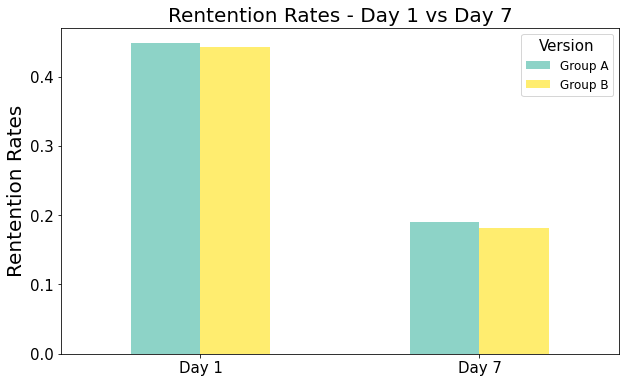

In [68]:
# Display the probability of rentention 
df_day1 = user_df.groupby('version').sum()['retention_1'] / user_df.groupby('version').count()['retention_1']
df_day7 = user_df.groupby('version').sum()['retention_7'] / user_df.groupby('version').count()['retention_7']

df_retention = df_day1.to_frame().join(df_day7)
df_retention.columns = ['Day 1', 'Day 7']
df_retention.index = ['Group A', 'Group B']

ax = df_retention.T.plot(kind='bar', rot=False, fontsize=15, colormap='Set3', figsize=(10,6))
ax.set_title('Rentention Rates - Day 1 vs Day 7', fontsize=20)
plt.xticks(fontsize= 15)
ax.set_ylabel('Rentention Rates', size=20)
ax.legend(title="Version", fontsize=12, title_fontsize=15)
#set the bar label
for c in ax.containers:
    ax.bar_label(c, label_type='center', fmt='%.3f%%', fontsize=15)
plt.show();

<mark>__Analysis Results:__
- <mark>The probability of 7-day retention rate for Group A (Gate 30) at 0.190% is higher than Group B (Gate 40) at 0.182%. From this obversation, our recommendation will be to retain the Gate at level 30 and not move it to level 40.
- <mark>For Group A (Gate 30) version, the retention rate dropped from 45% to 19% from Day 1 to Day 7. This indicates that more than a quarter of active Day 1 players may have grown disinterested and stopped playing Cookie Cats within a period of 6 days. The company could look into providing more incentives to retain active players after their Day 1 with daily incremental bonuses to reward daily log-ins, side challenges for bonus points and in-game discounts for loyal customers etc.
  

## Q6. [Bonus Question]  Using bootstrap resampling, plot the retention rate distribution for both the groups inorder to visualize effect of different version of the game on retention.

### Define bootstrap function

In [69]:
def bootstrap_function(data, size):
    bs_result=np.empty(size)
    for i in range(size):
        bs_result[i] = (np.random.choice(data, len(data), replace=True)).mean()
    return bs_result

### Day 1 retention

#### Generate bootstrap distributions

Day 1 Retention Bootstrap Distributions


,Group_A,Group_B
0,0.446229,0.445822
1,0.449003,0.440744
2,0.447281,0.439645
3,0.446789,0.437864
4,0.448444,0.440898


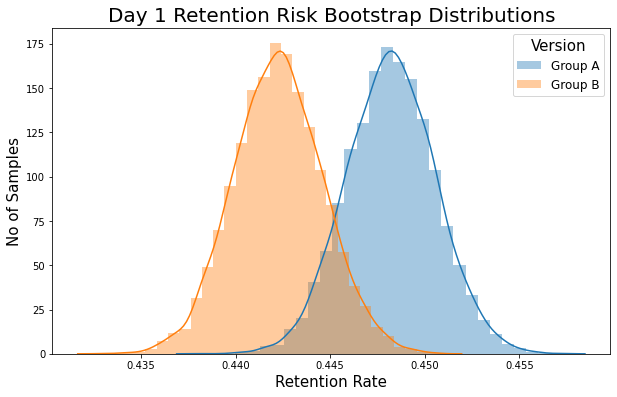

In [70]:
# n = number of samples
n = 10000

# Create bootstrap distributions for group_A and group_B
groupA_day1 = user_df[user_df.version == 'A']['retention_1']
groupB_day1 = user_df[user_df.version == 'B']['retention_1']
groupA_day1_bs = pd.DataFrame(bootstrap_function(groupA_day1, n), columns={'Group_A'})
groupB_day1_bs = pd.DataFrame(bootstrap_function(groupB_day1, n), columns={'Group_B'})
day1_bs = groupA_day1_bs.join(groupB_day1_bs)

# Display the bootstrap distributions 
print('Day 1 Retention Bootstrap Distributions')
display(day1_bs.head(5));

# Plot histogram with KDE of bootstrap distributions
fig, ax = plt.subplots(1,1, figsize=(10,6))
sns.distplot(day1_bs.Group_A, ax=ax, label='Group A', bins=30, kde=True)
sns.distplot(day1_bs.Group_B, ax=ax, label='Group B', bins=30, kde=True)
ax.set_title('Day 1 Retention Risk Bootstrap Distributions', fontsize=20)
ax.set_xlabel('Retention Rate', size = 15)
ax.set_ylabel('No of Samples', size = 15)
ax.legend(title="Version", fontsize=12, title_fontsize=15)
plt.show();

#### Calculate probablity of difference

Day 1 difference means = 1.35%
95% confidence interval = -0.17% and 2.84%
Probability of difference = 96.0%


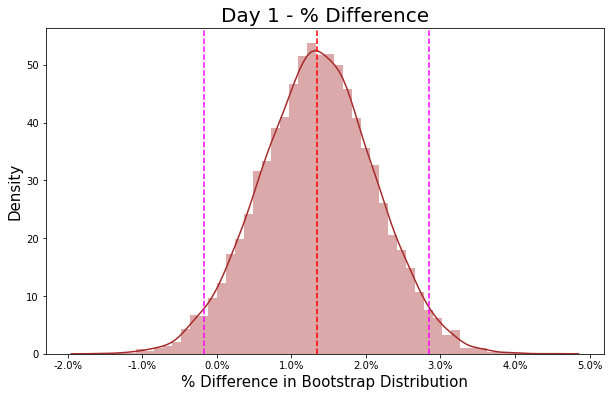

In [73]:
# Difference between Group A and Group B
day1_bs['difference'] = (day1_bs['Group_A'] - day1_bs['Group_B'])/day1_bs['Group_B']

# Calculate means and confidence interval 95% 
means1 = day1_bs.difference.mean()
ci = 0.95
con_list = [100*(1-ci)/2, 100*(1-(1-ci)/2)] 
conf_interval1 = np.percentile(day1_bs['difference'], con_list)
print('Day 1 difference means = {:.2%}'.format(means1))
print('95% confidence interval = {:.2%} and {:.2%}'.format(conf_interval1[0], conf_interval1[1]))

# Calculate probability of difference
prob_diff1 = (day1_bs['difference']>0).sum()/day1_bs.shape[0]
print('Probability of difference = {:.1%}'.format(prob_diff1))

# Plot KDE of bootstrap % difference 
fig, ax = plt.subplots(1,1, figsize=(10,6))
sns.distplot(day1_bs.difference, ax=ax, label='Day 1', hist=True, bins=50, color='brown')
ax.axvline(means1, color = "red", linestyle = 'dashed')
ax.axvline(conf_interval1[0], color = "magenta", linestyle = 'dashed')
ax.axvline(conf_interval1[1], color = "magenta", linestyle = 'dashed')
ax.set_title('Day 1 - % Difference', fontsize=20)
ax.set_xlabel('% Difference in Bootstrap Distribution', size = 15)
ax.set_ylabel('Density', size = 15)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show();

## Day 7 retention

#### Generate bootstrap distributions

Day 7 Retention Bootstrap Distributions


,Group_A,Group_B
0,0.191011,0.180813
1,0.189176,0.180879
2,0.190653,0.182198
3,0.189176,0.182572
4,0.189132,0.182418


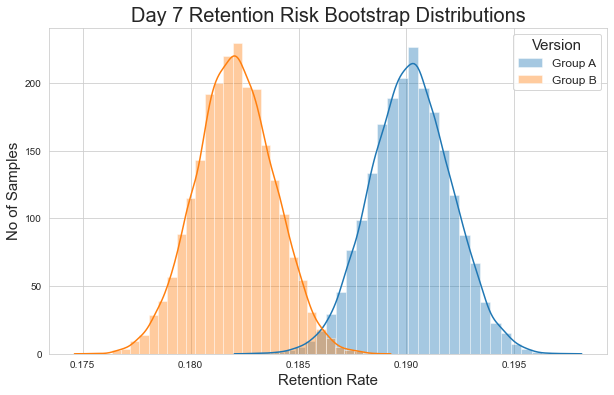

In [26]:
# n = number of samples
n = 10000

# Create bootstrap distributions for group_A and group_B
groupA_day7 = user_df[user_df.version == 'A']['retention_7']
groupB_day7 = user_df[user_df.version == 'B']['retention_7']
groupA_day7_bs = pd.DataFrame(bootstrap_function(groupA_day7, n), columns={'Group_A'})
groupB_day7_bs = pd.DataFrame(bootstrap_function(groupB_day7, n), columns={'Group_B'})
day7_bs = groupA_day7_bs.join(groupB_day7_bs)

# Display the bootstrap distributions 
print('Day 7 Retention Bootstrap Distributions')
display(day7_bs.head(5))

# Plot histogram with KDE of bootstrap distributions
fig, ax = plt.subplots(1,1, figsize=(10,6))
sns.distplot(day7_bs.Group_A, ax=ax, label='Group A', bins=30, kde=True)
sns.distplot(day7_bs.Group_B, ax=ax, label='Group B', bins=30, kde=True)
ax.set_title('Day 7 Retention Risk Bootstrap Distributions', fontsize=20)
ax.set_xlabel('Retention Rate', size = 15)
ax.set_ylabel('No of Samples', size = 15)
ax.legend(title="Version", fontsize=12, title_fontsize=15)
plt.show();

#### Calculate probablity of difference

Day 7 difference means = 4.49%
95% confidence interval = 1.68% and 7.34%
Probability of difference = 99.9%


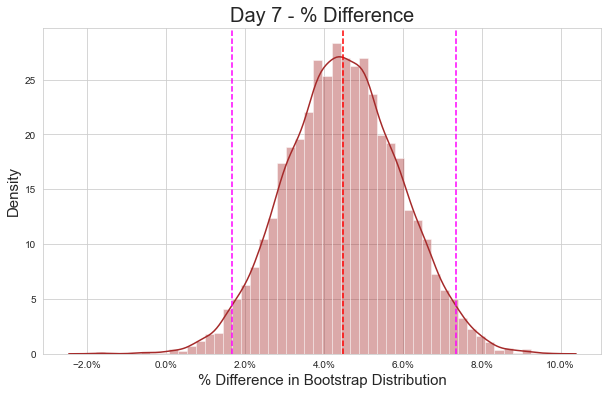

In [27]:
# Difference between Group A and Group B
day7_bs['difference'] = (day7_bs['Group_A'] - day7_bs['Group_B'])/day7_bs['Group_B']

# Calculate means and confidence interval 95% 
means7 = day7_bs.difference.mean()
ci = 0.95
con_list = [100*(1-ci)/2, 100*(1-(1-ci)/2)] 
conf_interval7 = np.percentile(day7_bs['difference'], con_list)
print('Day 7 difference means = {:.2%}'.format(means7))
print('95% confidence interval = {:.2%} and {:.2%}'.format(conf_interval7[0], conf_interval7[1]))

# Calculate probability of difference
prob_diff7 = (day7_bs['difference']>0).sum()/day7_bs.shape[0]
print('Probability of difference = {:.1%}'.format(prob_diff7))

# Plot KDE of bootstrap % difference 
fig, ax = plt.subplots(1,1, figsize=(10,6))
sns.distplot(day7_bs.difference, ax=ax, label='Day 1', hist=True, bins=50, color='brown')
ax.axvline(means7, color = "red", linestyle = 'dashed')
ax.axvline(conf_interval7[0], color = "magenta", linestyle = 'dashed')
ax.axvline(conf_interval7[1], color = "magenta", linestyle = 'dashed')
ax.set_title('Day 7 - % Difference', fontsize=20)
ax.set_xlabel('% Difference in Bootstrap Distribution', size = 15)
ax.set_ylabel('Density', size = 15)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show();

<mark>__Analysis Results:__
    
- <mark>The probability that Group A (Gate 30) retention is higher on both Day 1 and Day 7 than Group B (Gate 40) is at 96.8% and 99.9% respectively. Based on this probability, our recommendation is for Cookie Cats to retain the first gate at level 30, and **not** move the gate to level 40, for a better retention rate.
- <mark>For Group A (Gate 30) version, the retention rate dropped from 45% to 19% from Day 1 to Day 7. This indicates that more than a quarter of active Day 1 players may have grown disinterested and stopped playing Cookie Cats within a period of 6 days. The company could look into providing more incentives to retain active players after their Day 1 with daily incremental bonuses to reward daily log-ins, side challenges for bonus points and in-game discounts for loyal customers etc.
  